# Analyzing Historical Stock/Revenue Data

In [13]:
import yfinance as yf
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# Extract Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="1y")

# Reset the index
tesla_data.reset_index(inplace=True)

# Display the first five rows
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2024-02-05 00:00:00-05:00,184.259995,184.679993,175.009995,181.059998,134294400,0.0,0.0
1,2024-02-06 00:00:00-05:00,177.210007,186.490005,177.110001,185.100006,122676000,0.0,0.0
2,2024-02-07 00:00:00-05:00,188.179993,189.789993,182.679993,187.580002,111535200,0.0,0.0
3,2024-02-08 00:00:00-05:00,189.000000,191.619995,185.580002,189.559998,83034000,0.0,0.0
4,2024-02-09 00:00:00-05:00,190.179993,194.119995,189.479996,193.570007,84476300,0.0,0.0


In [17]:
# URL for Tesla's financial data
url = "https://finance.yahoo.com/quote/TSLA/financials?p=TSLA"
response = requests.get(url)

# Parse the content using BeautifulSoup
soup = BeautifulSoup(response.content, "html.parser")

# Find the revenue data from the page
revenue_table = soup.find_all("td")
revenues = [td.text for td in revenue_table if "Revenue" in td.text]

# You can create a dataframe if needed
tesla_revenue = pd.DataFrame(revenues, columns=["Revenue"])
tesla_revenue.tail()  # Display the last five rows

,Revenue


In [16]:
# Extract GameStop stock data
gamestop = yf.Ticker("GME")
gme_data = gamestop.history(period="1y")

# Reset the index
gme_data.reset_index(inplace=True)

# Display the first five rows
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2024-02-05 00:00:00-05:00,14.50,14.61,13.40,13.46,4361500,0.0,0.0
1,2024-02-06 00:00:00-05:00,13.60,14.30,13.43,14.10,3047800,0.0,0.0
2,2024-02-07 00:00:00-05:00,14.12,14.30,13.78,14.07,1947800,0.0,0.0
3,2024-02-08 00:00:00-05:00,14.01,14.44,13.89,14.35,1838300,0.0,0.0
4,2024-02-09 00:00:00-05:00,14.37,15.23,14.30,14.66,3575300,0.0,0.0


In [11]:
# URL for GameStop's financial data
url = "https://finance.yahoo.com/quote/GME/financials?p=GME"
response = requests.get(url)

# Parse the content using BeautifulSoup
soup = BeautifulSoup(response.content, "html.parser")

# Extract revenue data
revenue_table = soup.find_all("td")
revenues = [td.text for td in revenue_table if "Revenue" in td.text]

# Create a dataframe for the GameStop revenue
gme_revenue = pd.DataFrame(revenues, columns=["Revenue"])
gme_revenue.tail()  # Display the last five rows

,Revenue


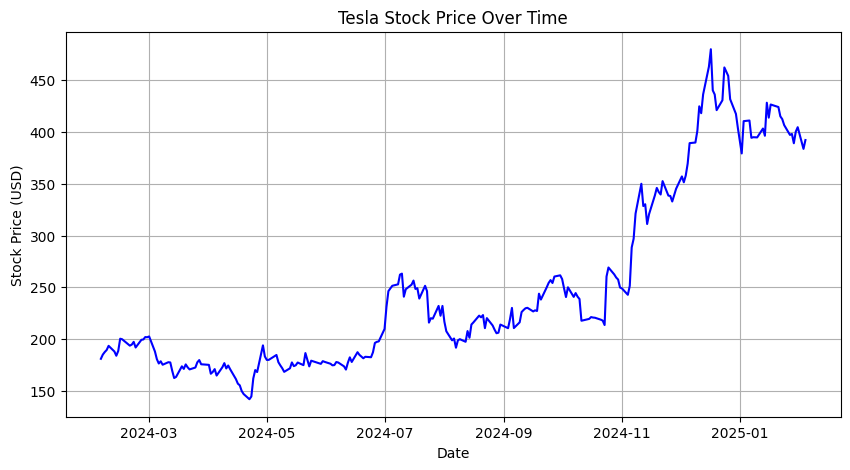

In [14]:
# Plotting Tesla's stock graph
def make_graph(data, title="Stock Data"):
    plt.figure(figsize=(10,5))
    plt.plot(data['Date'], data['Close'], label='Tesla Stock Price', color='blue')
    plt.xlabel('Date')
    plt.ylabel('Stock Price (USD)')
    plt.title(title)
    plt.grid(True)
    plt.show()

make_graph(tesla_data, title="Tesla Stock Price Over Time")

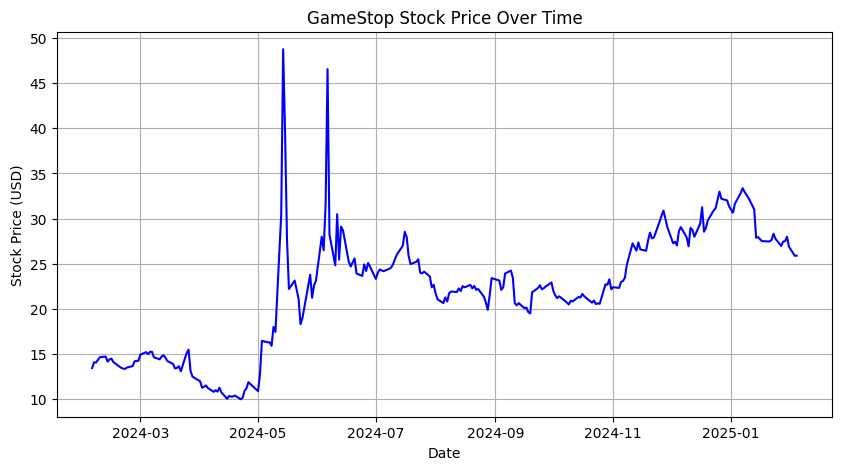

In [15]:
# Plotting GameStop's stock graph
make_graph(gme_data, title="GameStop Stock Price Over Time")